#Atividade
 
 
*   Entregar um documento COLAB do Google com os resultados da classificação de um conjunto de dados da aula 04.19 comparando dois tipos de validação cruzada.

#### 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [ ]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

    *  Aqui serão importados os módulos do sklearn para realizar o K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut

In [ ]:
def KNN_k_find(x: np.ndarray, y: np.ndarray, max_k: int) -> list:
  '''
  returns a list with the accuracy of a K-Nearest Neighbors for different "n_neighbors" values

  PARAMETERS:
      x (np.ndarray): Data Predictors
      y (np.ndarray): Data Classes
      max_k (int): Max value of "n_neighbors"

  RETURNS:
      (list): list with different values of accuracy stored in

  '''
  accuracy = []

  for _ in range(1, max_k + 1):

    clf_knn = KNN(n_neighbors = _)
    clf_knn.fit(x, y)
    test_predict = clf_knn.predict(x)
    accuracy.append(accuracy_score(y, test_predict) * 100)

  return accuracy

#### 2.   Leitura dos Datasets
      *   O dataset "Iris"
      *   O dataset será retirado de um repositório pessoal do GITHUB


In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Iris.csv')
iris = iris.drop(["Id"], axis = 1)
 
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### 3.   Gráficos dos dados inalterados

    * Contabilização das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris dataset')

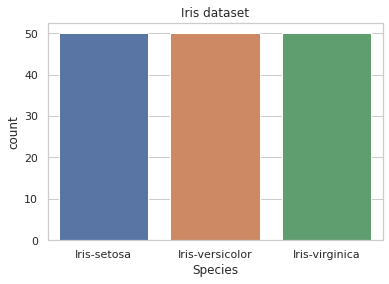

In [ ]:
sns.countplot(iris['Species']).set_title("Iris dataset")

Atravéz deste plot é possível perceber que o dataset IRIS possui classes balanceadas

    * Cálculo e plot da matriz de correlação

Text(0.5, 1.0, 'Matriz de correlação do Iris')

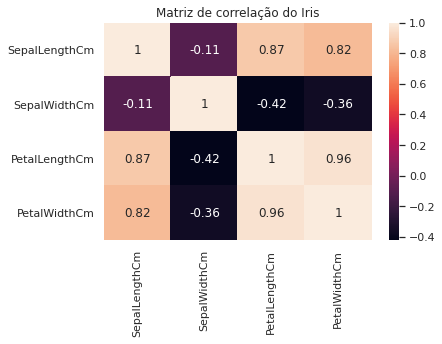

In [ ]:
sns.heatmap(iris.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Iris")

É possivel perceber a alta correlação positiva que existe entre os dados da iris, com exceção ao parâmetro "SepalWidthCm" que possui correlação baixa ou mediana com todos os outros parâmetros.

    * Pairplot do dataset IRIS para melhor visualização das caracteristicas de correlação

Text(0.475, 1.01, 'Pairplot do dataset Iris')

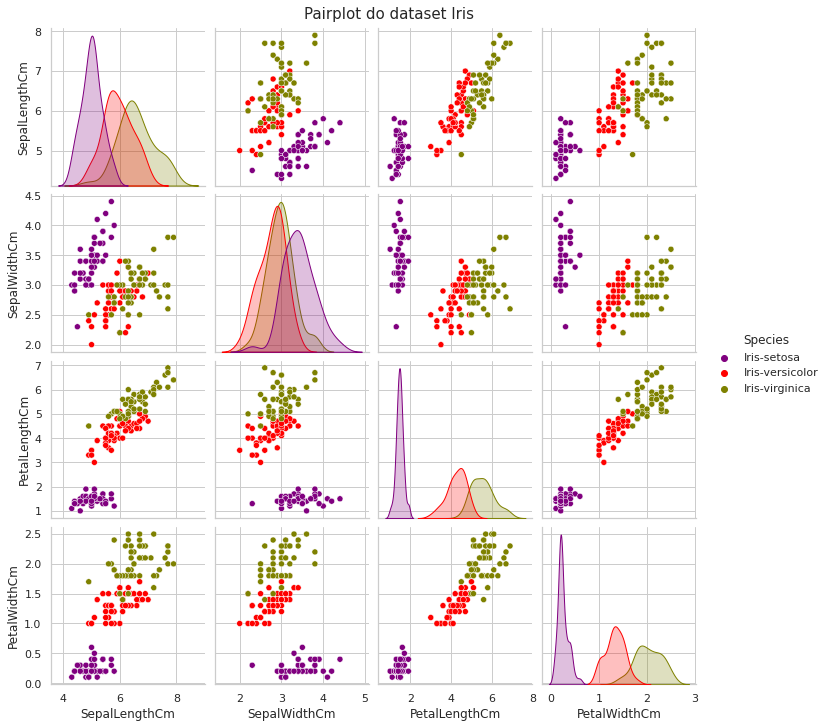

In [ ]:
pair_plot = sns.pairplot(iris, hue = "Species", palette = "brg")
pair_plot.fig.suptitle("Pairplot do dataset Iris", fontsize = 15, x = 0.475, y = 1.01)

Atravéz do pairplot, é possível perceber a correlação mostrada na matriz de correlação como no caso do gráfico de "PetalLengthCm" e do "PetalWidthCm" que possui um comportamento bastante linear devida a alta correlação ou como no gráfico do "SepalWidthCm" e do "SepalLengthCm" que possui um gráfico mais disperso devido a baixa correlação.

#### 4. Encontrando o melhor valor de vizinhos (n_neighbors)

    * Será a separação dos previsores e das classes

In [ ]:
x_iris = iris.iloc[:,:4].values
y_iris = iris.iloc[:,4].values

    * Encontrando o melhor valor de "n_neighbors"

In [ ]:
#Escolhendo o valor máximo de n_neighbors(k)
k_max_iris = int(round(np.sqrt(len(y_iris))))   #O "k" é geralmente escolhido pela raiz quadrada da quantidades de dados usados para o treino

print(f"k máximo iris = {k_max_iris}")

k máximo iris = 12


Text(0, 0.5, 'Accuracy')

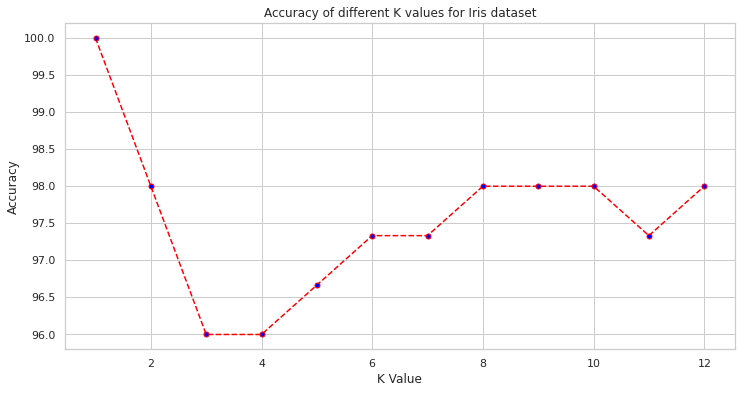

In [ ]:
#Plotando o gráfico de acurácia do iris
iris_k_list = KNN_k_find(x_iris, y_iris, k_max_iris)

plt.figure(figsize=(12, 6))
plt.plot(range(1, k_max_iris + 1), iris_k_list, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Accuracy of different K values for Iris dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

O melhor valor de do parâmetro "n_neighbors" é 9. Ele será utilizado para criar o classificador.

#### 5. Validação cruzada


Método 1: Validação cruzada k-fold

*   O método "kfold" divide o dataset em uma quantidade de grupos determinadas pela variável "n_splits". Destes grupos, o primeiro é escolhido como a parte de teste e os grupos restantes serão usados para treino. A partir disto, é feito o calculo de precisão e ele é armazenado em uma lista. Na proxima iteração, o grupo seguinte é então usado para teste e o resto para treino e isto acontece até todos os grupos serem usados para teste.
Com todos os resultados armazenados em uma lista, pega-se a média entre eles para o valor de precisão do modelo.



In [ ]:
kfold = KFold(n_splits = 10)
Classificador_kfold = KNN(n_neighbors = 9)
results_kfold = cross_val_score(Classificador_kfold, x_iris, y_iris, cv = kfold)
print("Pontuação de precisão kfold: {}%".format(round(results_kfold.mean()*100, 4)))
print(results_kfold)

Pontuação de precisão kfold: 93.3333%
[1.         1.         1.         1.         0.86666667 0.86666667
 1.         0.93333333 0.73333333 0.93333333]


Método 2: Validação cruzada Leave One Out


*   O "*Leave One Out*" é uma exceção do "*kfold*" em que a quantidade de grupos é igual a quantidade de dados, ou seja, igual a quantidade de linhas do dataset. Deste modo, uma única linha é tirada para teste (dando o nome da técnica) e o restante é usada para treino até que todos os dados tenham sido usado para teste. Devido ao jeito como funciona, é um método de alto custo computacional. 


In [ ]:
L1O = LeaveOneOut()
Classificador_L1O = KNN(n_neighbors = 9)
results_L1O = cross_val_score(Classificador_L1O, x_iris, y_iris, cv = L1O)
print("Pontuação de precisão Leave One Out: {}%".format(round(results_L1O.mean()*100, 4)))
print(results_L1O)

Pontuação de precisão Leave One Out: 96.6667%
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
